<Figure size 640x480 with 0 Axes>

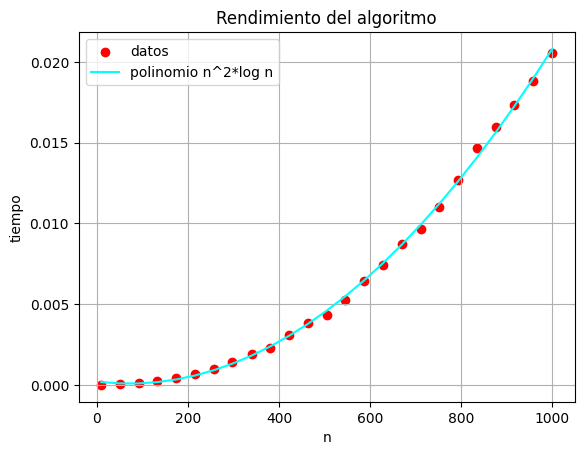

In [322]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Esto no es bueno hacerlo, porque no permite ver bien diferencias.
fig = plt.figure()

fig, ax = plt.subplots()

df = pd.read_csv("runtime-data/runtime-rank-y-compression.csv")
c1 = np.polynomial.polynomial.Polynomial.fit(df['n'],df['time'],2)

#co = np.polyfit(np.log(df['n']),df['time'],6) # Use log(x) as the input to polyfit.
#fit = np.poly1d(co) 

ax.scatter(df['n'],df['time'],color='red', label='datos')
#ax.plot(df['n'],fit(np.log(df['n'])),color='red', label='polinomio n^2*log n')
ax.plot(df['n'],c1(df['n']),color='cyan', label='polinomio n^2*log n')

ax.set_title("Rendimiento del algoritmo")
ax.legend()

plt.xlabel("n")
plt.ylabel("tiempo")
plt.grid(True)


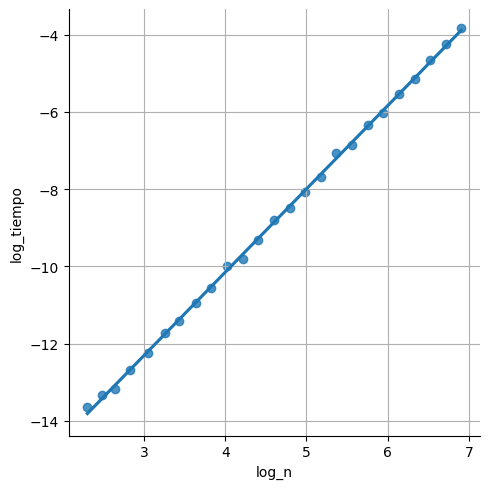

In [230]:
df['log_time'] = np.log(df['time'])
df['log_n'] = np.log(df['n'])
ax1 = sns.lmplot(x='log_n', y='log_time', data=df)
plt.xlabel("log_n")
plt.ylabel("log_tiempo")
plt.grid(True)

In [256]:
r = np.corrcoef(df['time'], df['n']*df['n']*np.log(df['n']))[0,1]
print("Coeficiente de correlacion de Person: r="+str(r))

Coeficiente de correlacion de Person: r=0.9997671992519765


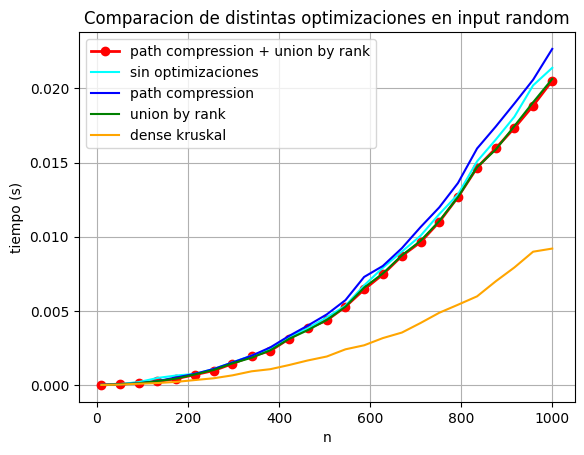

In [321]:
# Comparaciones

df = pd.read_csv("runtime-data/runtime-rank-y-compression.csv")
df2 = pd.read_csv("runtime-data/runtime-lista.csv")
df3 = pd.read_csv("runtime-data/runtime-arbol.csv")
df4 = pd.read_csv("runtime-data/runtime-path-compression.csv")
df5 = pd.read_csv("runtime-data/runtime-union-by-rank.csv")
df6 = pd.read_csv("runtime-data/runtime-dense.csv")

df['t_lista'] = df2['time']
df['t_arbol'] = df3['time']
df['t_path_compression'] = df4['time']
df['t_union_by_rank'] = df5['time']
df['t_dense'] = df6['time']

fig, ax = plt.subplots()

ax.plot(df['n'],df['time'],color='red', label='path compression + union by rank', linewidth=2, marker='o')
#ax.scatter(df['n'],df['time'],color='red', label='path compression + union by rank')
ax.plot(df['n'],df['t_arbol'],color='cyan', label='sin optimizaciones')
#ax.plot(df['n'],df['t_lista'],color='yellow', label='lista enlazada')
ax.plot(df['n'],df['t_path_compression'],color='blue', label='path compression')
ax.plot(df['n'],df['t_union_by_rank'],color='green', label='union by rank')
ax.plot(df['n'],df['t_dense'], color='orange', label='dense kruskal')

plt.xlabel("n")
plt.ylabel("tiempo (s)")

ax.set_title("Comparacion de distintas optimizaciones en input random")
ax.legend()
ax.grid(True)

plt.show()

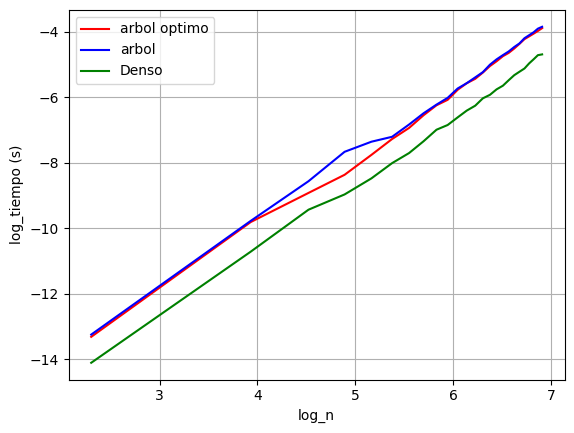

In [319]:
df = pd.read_csv("runtime-data/runtime-rank-y-compression.csv")
df2 = pd.read_csv("runtime-data/runtime-lista.csv")
df3 = pd.read_csv("runtime-data/runtime-arbol.csv")
df4 = pd.read_csv("runtime-data/runtime-path-compression.csv")
df5 = pd.read_csv("runtime-data/runtime-union-by-rank.csv")
df6 = pd.read_csv("runtime-data/runtime-dense.csv")

df['t_lista'] = df2['time']
df['t_arbol'] = df3['time']
df['t_path_compression'] = df4['time']
df['t_union_by_rank'] = df5['time']
df['t_dense'] = df6['time']

fig, ax = plt.subplots()

#ax.scatter(np.log(df['n']),np.log(df['time']),color='red')
ax.plot(np.log(df['n']),np.log(df['time']),color='red', label='arbol optimo')
#ax.scatter(np.log(df['n']),np.log(df['t_arbol']),color='blue')
ax.plot(np.log(df['n']),np.log(df['t_arbol']),color='blue', label='arbol')
#ax.scatter(np.log(df['n']),np.log(df['t_dense']),color='green')
ax.plot(np.log(df['n']),np.log(df['t_dense']),color='green', label='Denso')


plt.xlabel("log_n")
plt.ylabel("log_tiempo (s)")

ax.legend()
ax.grid(True)

plt.show()

In [334]:
#log_c = np.average(np.log(df['time_unsorted']) - np.log(df['time']   ))
log_c = np.average(np.log(df['time'])- np.log(df['t_dense']))
print("La constante entre ambos conjuntos de datos es c=" + str(np.exp(log_c)))

La constante entre ambos conjuntos de datos es c=2.231750262312122


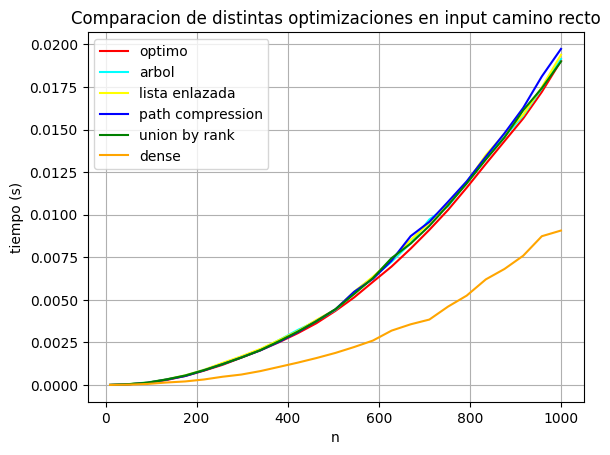

In [333]:
df = pd.read_csv("runtime-data/runtime-rank-y-compression.csv")
df2 = pd.read_csv("runtime-data/runtime-lista.csv")
df3 = pd.read_csv("runtime-data/runtime-arbol.csv")
df4 = pd.read_csv("runtime-data/runtime-path-compression.csv")
df5 = pd.read_csv("runtime-data/runtime-union-by-rank.csv")
df6 = pd.read_csv("runtime-data/runtime-dense.csv")

df['t_lista'] = df2['time']
df['t_arbol'] = df3['time']
df['t_path_compression'] = df4['time']
df['t_union_by_rank'] = df5['time']
df['t_dense'] = df6['time']

fig, ax = plt.subplots()

ax.plot(df['n'],df['time'],color='red', label='optimo')
ax.plot(df['n'],df['t_arbol'],color='cyan', label='arbol')
ax.plot(df['n'],df['t_lista'],color='yellow', label='lista enlazada')
ax.plot(df['n'],df['t_path_compression'],color='blue', label='path compression')
ax.plot(df['n'],df['t_union_by_rank'],color='green', label='union by rank')
ax.plot(df['n'],df['t_dense'], color='orange', label='dense')

plt.xlabel("n")
plt.ylabel("tiempo (s)")

ax.set_title("Comparacion de distintas optimizaciones en input camino recto")
ax.legend()
ax.grid(True)

plt.show()